## A lo largo de este proyecto vamos a cubrir cubrir los siguientes puntos:

- EDA preliminar.
- Transformación y limpieza de los datos.
- Análisis descriptivo de los datos.
- Visualización de los datos.
- Informe explicativo del análisis.


# EDA preliminar para saber que limpiar.

In [206]:
# Lo primero importar la libreria de PANDAS (Biblioteca de Python para el análisis y manipulaciónn de datos)
import pandas as pd
import numpy as np


In [207]:
#Leemos el archivo csv y lo convertimos a un DataFrame.
df_o = pd.read_csv('archivos/bank_additional.csv',index_col=0)
df_o.sample(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
19906,NaN,admin.,MARRIED,high.school,NaN,0.0,0.0,cellular,61,3,999,0,NONEXISTENT,1.4,"93,444","-36,1",NaN,"5228,1",no,28-mayo-2017,45.801,-113.256,52e89342-f35d-4db8-abeb-d0f8c3dbc4c4
10493,43.0,technician,SINGLE,professional.course,0.0,0.0,0.0,telephone,315,2,999,0,NONEXISTENT,1.4,"94,465","-41,8","4,961","5228,1",no,30-junio-2019,37.681,-103.382,519aef8b-f46e-4f29-96b5-ddb089fe4e70
1358,41.0,admin.,MARRIED,basic.9y,NaN,1.0,0.0,telephone,161,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,855",5191,no,5-octubre-2018,31.152,-90.419,54082403-7a0d-4772-8d31-13c560a62b4f
40573,22.0,student,SINGLE,high.school,0.0,0.0,0.0,cellular,369,3,5,1,SUCCESS,-1.1,"94,199","-37,5","0,886","4963,6",yes,9-mayo-2017,27.673,-68.425,e6f9dd33-9f17-4556-b2cc-474d57429fc5
39159,NaN,admin.,SINGLE,high.school,0.0,0.0,0.0,cellular,153,2,4,2,SUCCESS,-1.8,"93,369","-34,8","0,655","5008,7",yes,6-julio-2018,28.094,-75.619,4f3cdfda-267d-47d2-873e-232e058d9f1b


In [208]:
#Hacemos una copia para evitar cambiar el archivo original y trabajaremos sobre ella.
df = df_o.copy()
df.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097


In [209]:
#Debido al tamaño del csv al hacer el head anterior vemos que no aparecen todas las columnas.
#Para que esto no ocurra utilizamos el siguiente método.

pd.set_option ('display.max_columns', None)
df.sample(3)


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
10110,59.0,services,DIVORCED,high.school,0.0,0.0,0.0,telephone,133,1,999,0,NONEXISTENT,1.4,"94,465","-41,8","4,958","5228,1",no,22-mayo-2017,41.229,-102.667,7eef18bc-0e88-42d7-88bd-1cd30d8eb9eb
28268,55.0,admin.,DIVORCED,university.degree,0.0,1.0,0.0,cellular,628,1,999,1,FAILURE,-1.8,"93,075","-47,1","1,445","5099,1",no,10-abril-2018,26.470,-87.854,8a7623de-c574-4202-ba2b-1789becbc989
7382,NaN,admin.,SINGLE,high.school,0.0,0.0,1.0,telephone,96,2,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,864",5191,no,8-julio-2016,44.115,-68.878,a7288b78-e78d-4167-8cc4-dee2bfbf4554


In [210]:
#Vemos que tipo de columnas tenemos.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.employed     43000 non-null  obje

In [205]:
#Otra manera de verlo seria:
df.dtypes

age               float64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx     object
cons.conf.idx      object
euribor3m          object
nr.employed        object
y                  object
date               object
latitude          float64
longitude         float64
id_                object
dtype: object

In [211]:
df.isnull().sum() #asi se pueden ver si tienen nulos pero no sabemos cuanto representan en la totalidad del DATA FRAME.

age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

In [212]:
#Nos interesaria saber más el % de nulos ya que dependiendo de ello trabajariamos de una forma u otra.
round (df.isnull().mean()*100,2)

age               11.91
job                0.80
marital            0.20
education          4.20
default           20.89
housing            2.39
loan               2.39
contact            0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     1.10
cons.conf.idx      0.00
euribor3m         21.53
nr.employed        0.00
y                  0.00
date               0.58
latitude           0.00
longitude          0.00
id_                0.00
dtype: float64

In [213]:
#Miremos ahora si tiene duplicados.
df.duplicated().sum()

#No tiene duplicados (np.inte64 = 0)

np.int64(0)

In [214]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37880.0,39.977112,10.437957,17.000,32.00000,38.0000,47.00000,98.000
default,34019.0,0.000088,0.009390,0.000,0.00000,0.0000,0.00000,1.000
housing,41974.0,0.535998,0.498708,0.000,0.00000,1.0000,1.00000,1.000
loan,41974.0,0.155620,0.362499,0.000,0.00000,0.0000,0.00000,1.000
duration,43000.0,257.739279,258.666033,0.000,102.00000,179.0000,319.00000,4918.000
campaign,43000.0,2.567233,2.772294,1.000,1.00000,2.0000,3.00000,56.000
pdays,43000.0,962.330953,187.260394,0.000,999.00000,999.0000,999.00000,999.000
previous,43000.0,0.174023,0.497366,0.000,0.00000,0.0000,0.00000,7.000
emp.var.rate,43000.0,0.077128,1.573898,-3.400,-1.80000,1.1000,1.40000,1.400
latitude,43000.0,36.856697,7.225948,24.396,30.61475,36.7610,43.11325,49.384


In [215]:
df.value_counts('education')

education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
illiterate                18
Name: count, dtype: int64

In [216]:
for col in df.select_dtypes(include ='O').columns:
    print (col.upper())
    print (df[col].value_counts())
    print ('---------------------')

#así podemos ver los valores únicos de cada columna

JOB
job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64
---------------------
MARITAL
marital
MARRIED     25999
SINGLE      12105
DIVORCED     4811
Name: count, dtype: int64
---------------------
EDUCATION
education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
illiterate                18
Name: count, dtype: int64
---------------------
CONTACT
contact
cellular     27396
telephone    15604
Name: count, dtype: int64
---------------------
POUTCOME
poutcome
NONEXISTENT    37103
FAILURE         4461
SUCCESS         1436
Name: count, dtype: int64
---------------------
CONS.PRICE.IDX
cons.price.idx
93,994    7938
93,918    6937
92,893    5

## Conclusiones del EDA preliminar: Cosas a limpiar de DataFrame

- Años en float, ponerlo en int
- Mayusculas y minusculas
- Tenemos nulos
- Tenemos puntos y comas
- Latitud y longitud no aparece en el enunciado que nos han pasado.
- El Id es ilegible.
- Fechas raras.

##### Columnas:
- **Age** ->  La edad del cliente. Pasarlo a int. Tiene un 11,91% nulos. OK
- **job** -> La ocupación o profesión del cliente. tiene un 0,80% de nulos. OK
- **Marital** ->  El estado civil del cliente.Pasarlo a minusculas.Tiene un 0,20% nulos. OK
- **education** ->  El nivel educativo del cliente. Cambiar el punto por un guion bajo. Tiene un 4,20% nulos. OK
- **Default** -> Indica si el cliente tiene algún historial de incumplimiento de pagos (1: Sí, 0: No)incumplimiento de pagos si o no. (0 o 1). Pasarlo de float a object con si o no.Tiene un 0,20,89% nulos. OK
- **housing** -> Indica si el cliente tiene un préstamo hipotecario (1: Sí, 0: No).
pasarlo a si o no. Tiene un 2,39% nulos. OK
- **loan** -> Indica si el cliente tiene algún otro tipo de préstamo (1: Sí, 0: No). pasarlo a si o no. Tiene un 2,39% nulos.OK
- **contact** ->  El método de contacto utilizado para comunicarse con el cliente. Está todo ok por lo tanto no cambiar nada. OK
- **duration** -> La duración en segundos de la última interacción con el cliente. OK
- **campaign** -> El número de contactos realizados durante esta campaña para este cliente. OK
- **pdays** -> Número de días que han pasado desde la última vez que se contactó con el cliente durante esta campaña. OK
- **previous** -> Número de veces que se ha contactado con el cliente antes de esta campaña. OK
- **poutcome** -> Resultado de la campaña de marketing anterior. Tiene un 4,20% de nulos. OK
- **emp.var.rate** -> La tasa de variación del empleo. Pasarlo a si o no. OK
- **cons.price.idx** ->  El índice de precios al consumidor.Tiene un 1,10% nulos OK
- **cons.confi.idx** -> El índice de confianza del consumidor. Todos los valores son negativos.¿es normal? OK
- **euribor3m** -> La tasa de interés de referencia a tres meses. Tiene un 21,53% nulos. OK
- **nr.employed** -> El número de empleados. Pasar de float a int???
- **y** -> Indica si el cliente ha suscrito un producto o servicio (Sí/No). pasar de object a bool o texto(si,no).OK
- **date** -> La fecha en la que se realizó la interacción con el cliente. pasar de object a fecha. Tiene un 0,58% nulos. OK
- **latitude y longitud** -> no aparecen definidas en el enunciado del ejercicio por lo que deberiamos eliminarlas. OK
- **id**-> Un identificador único para cada registro en el dataset. Pasar object a ....

# Transformación y la limpieza de los datos.

#### Eliminación de columnas.

In [ ]:
#Eliminación de columnas que no tienen sentido porque no aparecen en el enunciado.
df = df.drop (['latitude','longitude'],axis=1)

In [220]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'id_'],
      dtype='object')

#### Homogeneizar datos de la tabla.

In [221]:
df['education']=df['education'].str.replace ('.','_')
df.dtypes

age               float64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx     object
cons.conf.idx      object
euribor3m          object
nr.employed        object
y                  object
date               object
id_                object
dtype: object

In [222]:
df.sample()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
7408,58.0,housemaid,MARRIED,basic_4y,NaN,1.0,0.0,telephone,652,2,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,864",5191,no,21-abril-2017,50d39fe8-f398-4642-8c1b-f7bceba36e6c


In [ ]:
#Cambiamos el campo a tipo int pq no tiene sentido un float para edades. En este caso debido a que tiene NaN ponemos Int64 pq 
#sino no funcionaria con int64.
df['age'] = df['age'].round().astype('Int64')
df.sample()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
21133,35,technician,married,professional_course,0.0,1.0,1.0,cellular,882,4,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228,yes,2016-09-19,54f256ba-fc48-4b40-af29-7aaaaa1aabbc


In [229]:
df.dtypes

age                 Int64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx     object
cons.conf.idx      object
euribor3m          object
nr.employed        object
y                  object
date               object
id_                object
dtype: object

In [232]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'id_'],
      dtype='object')

In [233]:
#Revisamos todas las columnas y en este caso las pasamos de mayúsculas a minúsculas.

for col in df.select_dtypes(include='O').columns:
    df[col]=df[col].str.lower()

In [234]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
0,<NA>,housemaid,married,basic_4y,0.0,0.0,0.0,telephone,261,1,999,0,nonexistent,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57,services,married,high_school,NaN,0.0,0.0,telephone,149,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,e9d37224-cb6f-4942-98d7-46672963d097


#### Pasar datos a fecha (Utilizar la libreria DateTime)

In [235]:
df.info() #si nos fijamos el tipo de la columna date es object y nosotros queremos pasarla a fecha.

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  Int64  
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.employed     43000 non-null  obje

In [236]:
df.sample() #verificamos la columna date

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
25564,<NA>,blue-collar,married,basic_6y,0.0,1.0,0.0,cellular,169,1,999,0,nonexistent,-0.1,"93,2",-42,"4,12","5195,8",no,2-julio-2016,fa0e3f7c-b4a3-40c1-9f14-38ee0687584f


In [237]:
#debemos pues crear una libreria y cambiar dichos valores como enero a 01.

meses = {
    'enero':'01',
    'febrero':'02',
    'marzo' :'03',
    'abril' :'04',
    'mayo':'05',
    'junio':'06',
    'julio':'07',
    'agosto':'08',
    'septiembre':'09',
    'octubre':'10',
    'noviembre':'11',
    'diciembre':'12'
}

In [238]:
#con este código cambiamos la columna date pero solo lo visualizamos.
df.replace({'date':meses},regex=True)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
0,<NA>,housemaid,married,basic_4y,0.0,0.0,0.0,telephone,261,1,999,0,nonexistent,1.1,"93,994","-36,4","4,857",5191,no,2-08-2019,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57,services,married,high_school,NaN,0.0,0.0,telephone,149,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,14-09-2016,e9d37224-cb6f-4942-98d7-46672963d097
2,37,services,married,high_school,0.0,1.0,0.0,telephone,226,1,999,0,nonexistent,1.1,"93,994","-36,4","4,857",5191,no,15-02-2019,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40,admin.,married,basic_6y,0.0,0.0,0.0,telephone,151,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,29-11-2015,9991fafb-4447-451a-8be2-b0df6098d13e
4,56,services,married,high_school,0.0,0.0,1.0,telephone,307,1,999,0,nonexistent,1.1,"93,994","-36,4",NaN,5191,no,29-01-2017,eca60b76-70b6-4077-80ba-bc52e8ebb0eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19154,<NA>,admin.,married,university_degree,0.0,0.0,0.0,cellular,618,2,999,0,nonexistent,1.4,"93,444","-36,1",NaN,"5228,1",yes,13-10-2015,4eed05de-2a98-4227-b488-32122009b638
26206,34,technician,married,professional_course,0.0,1.0,1.0,cellular,42,7,999,0,nonexistent,-0.1,"93,2",-42,NaN,"5195,8",no,17-03-2018,0f0aca88-4088-4fe2-905f-44fb675d9493
15046,<NA>,blue-collar,single,basic_6y,0.0,1.0,0.0,cellular,391,2,999,0,nonexistent,1.4,"93,918","-42,7",NaN,"5228,1",no,15-09-2016,cadadd4b-7ee5-4019-b13a-ca01bb67ca5b
15280,<NA>,admin.,married,university_degree,NaN,0.0,0.0,cellular,674,3,999,0,nonexistent,1.4,"93,918","-42,7","4,958","5228,1",no,23-09-2019,5f432048-d515-4bb5-9c94-62db451f88d4


In [239]:
#para guardar los cambios hariamos lo siguiente.
df.replace({'date':meses},regex=True, inplace=True)

In [240]:
#volvemos a lanzar el código anterior de datetime para pasar ahora si el valor a fecha.
pd.to_datetime(df['date'], format = '%d-%m-%Y')

0       2019-08-02
1       2016-09-14
2       2019-02-15
3       2015-11-29
4       2017-01-29
           ...    
19154   2015-10-13
26206   2018-03-17
15046   2016-09-15
15280   2019-09-23
27570   2019-11-06
Name: date, Length: 43000, dtype: datetime64[ns]

In [241]:
#el código funciona pero si nos devuelve algo es que no esta cambiado todavia.
df['date'] = pd.to_datetime(df['date'], format = '%d-%m-%Y')

In [242]:
#ahora si ejecutado el codigo y mirando en info podemos ver que hemos cambiado el dato a fecha.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             37880 non-null  Int64         
 1   job             42655 non-null  object        
 2   marital         42915 non-null  object        
 3   education       41193 non-null  object        
 4   default         34019 non-null  float64       
 5   housing         41974 non-null  float64       
 6   loan            41974 non-null  float64       
 7   contact         43000 non-null  object        
 8   duration        43000 non-null  int64         
 9   campaign        43000 non-null  int64         
 10  pdays           43000 non-null  int64         
 11  previous        43000 non-null  int64         
 12  poutcome        43000 non-null  object        
 13  emp.var.rate    43000 non-null  float64       
 14  cons.price.idx  42529 non-null  object        
 15  cons.co

#### Cambiar las comas de los valores númericos por puntos. (En python los decimales van con puntos)

In [243]:
#Revisamos todas las columnas OBJECT y cambiamos las comas por puntos
for col in df.select_dtypes(include='O').columns:
    df[col]=df[col].str.replace (',','.')
    try:
        df[col]=df[col].astype(float)
    except:
        pass

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             37880 non-null  Int64         
 1   job             42655 non-null  object        
 2   marital         42915 non-null  object        
 3   education       41193 non-null  object        
 4   default         34019 non-null  float64       
 5   housing         41974 non-null  float64       
 6   loan            41974 non-null  float64       
 7   contact         43000 non-null  object        
 8   duration        43000 non-null  int64         
 9   campaign        43000 non-null  int64         
 10  pdays           43000 non-null  int64         
 11  previous        43000 non-null  int64         
 12  poutcome        43000 non-null  object        
 13  emp.var.rate    43000 non-null  float64       
 14  cons.price.idx  42529 non-null  float64       
 15  cons.co

In [245]:
df.sample()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
26386,57,technician,married,professional_course,0.0,1.0,0.0,cellular,302,4,999,0,nonexistent,-0.1,93.2,-42.0,4.076,5195.8,no,2016-05-09,c7ae33d1-8bf1-4ecb-8c7c-274dec08d5d9


#### Cambiar tipos de datos

In [ ]:
df['nr.employed'] = df['nr.employed'].round().astype('int64')#Hacemos el cambio ahora pq previamente teniamos que pasar el campo de object a float y ahora a int.
df.sample()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
3557,26,admin.,single,high_school,0.0,1.0,0.0,telephone,448,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191,no,2016-07-01,cc8e9c92-c589-43a7-bcd1-c966e294ce8e


In [255]:
df.dtypes

age                        Int64
job                       object
marital                   object
education                 object
default                  float64
housing                  float64
loan                     float64
contact                   object
duration                   int64
campaign                   int64
pdays                      int64
previous                   int64
poutcome                  object
emp.var.rate             float64
cons.price.idx           float64
cons.conf.idx            float64
euribor3m                float64
nr.employed                int64
y                         object
date              datetime64[ns]
id_                       object
dtype: object

In [256]:
dicc_loan = {1:'yes',
             0:'no'}

In [257]:
df['loan']= df['loan'].map(dicc_loan)

In [258]:
df['loan'].unique()

array(['no', 'yes', nan], dtype=object)

In [259]:
df.sample()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
16064,30,admin.,single,high_school,0.0,1.0,yes,cellular,254,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228,no,2017-03-20,027fd082-bcd7-464b-870b-fea2f12a3bba


In [260]:
dicc_housing={1:'yes',
              0:'no'}

In [261]:
df['housing']= df['housing'].map(dicc_housing)

In [262]:
df['housing'].unique()

array(['no', 'yes', nan], dtype=object)

In [263]:
dicc_default = {1:'yes',
              0:'no'}

In [264]:
df['default']= df['default'].map(dicc_default)

In [265]:
df['default'].unique()

array(['no', nan, 'yes'], dtype=object)

In [ ]:
#terminada la limpieza verificamos el resultado final.
#podriamos hacer el id más legible pero no encuntro una manera que no me genere posibles problemas.
df.head(2)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,id_
0,<NA>,housemaid,married,basic_4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2019-08-02,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57,services,married,high_school,NaN,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,NaN,5191,no,2016-09-14,e9d37224-cb6f-4942-98d7-46672963d097


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   age             37880 non-null  Int64         
 1   job             42655 non-null  object        
 2   marital         42915 non-null  object        
 3   education       41193 non-null  object        
 4   default         34019 non-null  object        
 5   housing         41974 non-null  object        
 6   loan            41974 non-null  object        
 7   contact         43000 non-null  object        
 8   duration        43000 non-null  int64         
 9   campaign        43000 non-null  int64         
 10  pdays           43000 non-null  int64         
 11  previous        43000 non-null  int64         
 12  poutcome        43000 non-null  object        
 13  emp.var.rate    43000 non-null  float64       
 14  cons.price.idx  42529 non-null  float64       
 15  cons.co

#### Gestión de Nulos

##### Visualizar cuantos nulos tenemos en %

In [167]:
#Visualizamos la cantidad de nulos que tenemos en las columnas.
df.isnull().sum()

age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
id_                  0
dtype: int64

In [168]:
len(df)

43000

In [169]:
#Cálculo de valores en %
(df.isnull().sum()/df.shape[0]*100).round(2)

#también podriamos hacer el cálculo con len(df): 'df.isnull().sum()/len(df)'

age               11.91
job                0.80
marital            0.20
education          4.20
default           20.89
housing            2.39
loan               2.39
contact            0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx     1.10
cons.conf.idx      0.00
euribor3m         21.53
nr.employed        0.00
y                  0.00
date               0.58
id_                0.00
dtype: float64

In [170]:
# Nuevo dataframe para ver únicamente los nulos
nulos = df.isnull().sum()/df.shape[0]*100

In [171]:
nulos>0

age                True
job                True
marital            True
education          True
default            True
housing            True
loan               True
contact           False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx     True
cons.conf.idx     False
euribor3m          True
nr.employed       False
y                 False
date               True
id_               False
dtype: bool

In [172]:
#Convertimos la serie en un DataFrame
pd.DataFrame(nulos,columns=['porcentaje_nulos'])

,porcentaje_nulos
age,11.906977
job,0.802326
marital,0.197674
education,4.202326
default,20.886047
housing,2.386047
loan,2.386047
contact,0.000000
duration,0.000000
campaign,0.000000


In [173]:
#Para hacerlo visualmente más legible vamos a quitar las columnas que no tengan nulos.T
df_nulos = pd.DataFrame(nulos,columns=['porcentaje_nulos'])
filtro = df_nulos['porcentaje_nulos']>0
df_nulos[filtro].round(2).sort_values(by='porcentaje_nulos',ascending=False)

,porcentaje_nulos
euribor3m,21.53
default,20.89
age,11.91
education,4.20
loan,2.39
housing,2.39
cons.price.idx,1.10
job,0.80
date,0.58
marital,0.20


---

##### Distinguir entre columnas categóricas y númericas.

In [174]:
#método que nos dice si hay nulos. Otra forma diferente a la anterior.
df.columns[df.isnull().any()]

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'cons.price.idx', 'euribor3m', 'date'],
      dtype='object')

In [175]:
#Con esto vemos todas la columnas
#df.columns pero nosotros solo queremos las categóricas.

#COLUMNAS CATEGÓRICAS CON NULOS
df[df.columns[df.isnull().any()]].select_dtypes(include='O').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')

In [176]:
df.shape

(43000, 21)

In [177]:
#Seleccionando las tipo Object como son variables categoricas no nos podria dar la media y lo que haria seria darnos otro tipo de cálculos 
#como el elemento más repetido en la columan (top)
df.describe(include='O').T

,count,unique,top,freq
job,42655,11,admin.,10873
marital,42915,3,married,25999
education,41193,7,university_degree,12722
default,34019,2,no,34016
housing,41974,2,yes,22498
loan,41974,2,no,35442
contact,43000,2,cellular,27396
poutcome,43000,3,nonexistent,37103
y,43000,2,no,38156
id_,43000,43000,993bbbd6-4dbc-4a40-a408-f91f8462bee6,1


In [178]:
#Veamos solo las columnas categoricas que tengan nulos.T

col_cat_nulos =df[df.columns[df.isnull().any()]].select_dtypes(include='O').columns #lo guardamos en una variable
col_cat_nulos


Index(['job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')

In [179]:
df_nulos = pd.DataFrame(nulos,columns=['porcentaje_nulos'])
filtro = df_nulos['porcentaje_nulos']>0
df_nulos[filtro].round(2).sort_values(by='porcentaje_nulos',ascending=False)

,porcentaje_nulos
euribor3m,21.53
default,20.89
age,11.91
education,4.20
loan,2.39
housing,2.39
cons.price.idx,1.10
job,0.80
date,0.58
marital,0.20


In [180]:
df['education']=df['education'].fillna('unknown')
df['job']=df['job'].fillna('unknown')
df['marital']=df['marital'].fillna('unknown')

In [181]:
df['marital'].value_counts()

marital
married     25999
single      12105
divorced     4811
unknown        85
Name: count, dtype: int64

In [182]:
df['education'].value_counts()

education
university_degree      12722
high_school             9925
basic_9y                6309
professional_course     5477
basic_4y                4356
basic_6y                2386
unknown                 1807
illiterate                18
Name: count, dtype: int64

In [183]:
df['job'].value_counts()

job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
unknown            345
Name: count, dtype: int64

In [184]:
#Veamos solo las columnas numéricas que tengan nulos.T

col_num_nulos =df[df.columns[df.isnull().any()]].select_dtypes(include='number').columns #lo guardamos en una variable
col_num_nulos

Index(['age', 'cons.price.idx', 'euribor3m'], dtype='object')

In [185]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [186]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

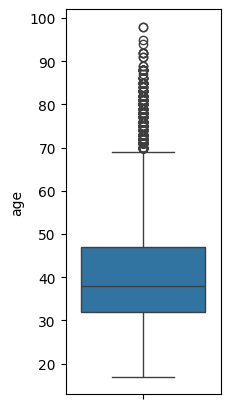

In [188]:
plt.figure(figsize=(2,5))
sns.boxplot(df['age'])
plt.show()

#vemos que tiene muchos outliers. Por tanto deberiamos utilizar la moda para tener un mejor análisis

In [189]:
mediana_age = df ['age'].median()
df['age'].fillna(mediana_age)
df['age'] = df['age'].fillna(mediana_age)

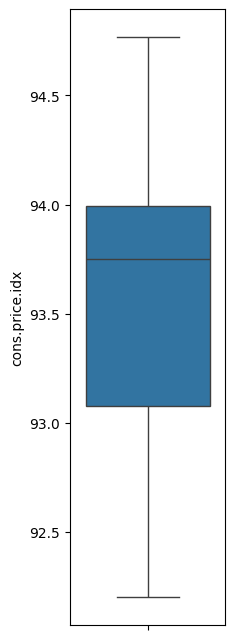

In [190]:
plt.figure(figsize=(2,8))
sns.boxplot(df['cons.price.idx'])
plt.show()

In [191]:
media_cons_price_idx = df ['cons.price.idx'].mean()
df['cons.price.idx'].fillna(media_cons_price_idx)
df['cons.price.idx'] = df['cons.price.idx'].fillna(media_cons_price_idx)

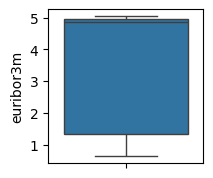

In [192]:
plt.figure(figsize=(2,2))
sns.boxplot(df['euribor3m'])
plt.show()

In [193]:
media_euribor3m = df ['euribor3m'].mean()
df['euribor3m'].fillna(media_euribor3m)
df['euribor3m'] = df['euribor3m'].fillna(media_euribor3m)

In [194]:
df['default']=df['default'].fillna('unknown')

In [195]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [196]:
df['loan']= df['loan'].fillna('unknown')

In [197]:
df['housing']=df['housing'].fillna ('unknown')

In [198]:
df['date']=df['date'].fillna('unknown')

### Confirmación de 0 nulos

In [199]:
#Confirmación de eliminación de todos los nulos.
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
date              0
id_               0
dtype: int64

### Guardar archivo

In [200]:
#Guardamos un nuevo archivo ya tratado para trabajar con él.
df.to_csv('archivos/bank_additional_sin_nulos.csv',index=False)

KeyboardInterrupt: 